# Predicting Red Wine Quality Using Ensemble Machine Learning Models

Author: Data-Git-Hub <br>
GitHub Project Repository Link: https://github.com/Data-Git-Hub/applied-ml-data-git-hub <br>
Dataset Link: https://archive.ics.uci.edu/ml/datasets/Wine+Quality <br>
15 April 2025 <br>

### Introduction

This project investigates the use of ensemble machine learning methods to classify the quality of red wine based on physicochemical properties. Ensemble models integrate the predictions of multiple base estimators to improve overall model performance and generalization. Techniques such as Random Forests, AdaBoost, Gradient Boosting, and Voting Classifiers are commonly employed to address the limitations of single-model approaches, particularly in reducing overfitting and increasing predictive reliability. <br>

The dataset used in this analysis is sourced from the UCI Machine Learning Repository and was originally compiled by Cortez, Cerdeira, Almeida, Matos, and Reis (2009). It contains various physicochemical attributes of red wine samples, such as fixed acidity, residual sugar, pH, alcohol content, and sulfur dioxide levels. Each sample includes a corresponding quality rating, evaluated by wine tasters on a scale from 0 to 10. To simplify the classification task, the original numerical ratings were categorized into three discrete classes: low, medium, and high quality. <br>

The objective of the analysis is to evaluate and compare multiple ensemble classification techniques using a range of performance metrics, including accuracy, precision, recall, and F1 score. The results are used to determine which models are most effective in predicting wine quality and to identify the trade-offs between model complexity and generalization. <br>

### Imports
Python libraries are collections of pre-written code that provide specific functionalities, making programming more efficient and reducing the need to write code from scratch. These libraries cover a wide range of applications, including data analysis, machine learning, web development, and automation. Some libraries, such as os, sys, math, json, and datetime, come built-in with Python as part of its standard library, providing essential functions for file handling, system operations, mathematical computations, and data serialization. Other popular third-party libraries, like pandas, numpy, matplotlib, seaborn, and scikit-learn, must be installed separately and are widely used in data science and machine learning. The extensive availability of libraries in Python's ecosystem makes it a versatile and powerful programming language for various domains. <br>

Pandas is a powerful data manipulation and analysis library that provides flexible data structures, such as DataFrames and Series. It is widely used for handling structured datasets, enabling easy data cleaning, transformation, and aggregation. Pandas is essential for data preprocessing in machine learning and statistical analysis. <br>
https://pandas.pydata.org/docs/ <br>

NumPy (Numerical Python) is a foundational library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a comprehensive collection of mathematical functions to operate on these arrays efficiently. NumPy is a key component in scientific computing and machine learning. <br>
https://numpy.org/doc/stable/ <br>

Matplotlib is a widely used data visualization library that allows users to create static, animated, and interactive plots. It provides extensive tools for generating various chart types, including line plots, scatter plots, histograms, and bar charts, making it a critical library for exploratory data analysis. <br>
https://matplotlib.org/stable/contents.html <br>

Seaborn is a statistical data visualization library built on top of Matplotlib, designed for creating visually appealing and informative plots. It simplifies complex visualizations, such as heatmaps, violin plots, and pair plots, making it easier to identify patterns and relationships in datasets. <br>
https://seaborn.pydata.org/ <br>

Scikit-learn provides a variety of tools for machine learning, including data preprocessing, model selection, and evaluation. It contains essential functions for building predictive models and analyzing datasets. <br>
sklearn.metrics: This module provides various performance metrics for evaluating machine learning models. <br>
https://scikit-learn.org/stable/modules/model_evaluation.html<br>

In [78]:
# Data handling
import pandas as pd
import numpy as np

# Machine learning imports
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, f1_score, classification_report, silhouette_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV, RFE, SelectKBest, f_classif, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Fully disable output truncation in Jupyter (for VS Code)
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display

### Section 1. Load and Inspect the Data

In this section, the dataset is loaded into a DataFrame for preliminary exploration. Inspecting the structure and contents of the data helps verify the format, identify missing values, and gain a general understanding of the features. This step is essential for planning appropriate preprocessing and model development strategies. <br>

In [79]:
df = pd.read_csv("data/winequality-red.csv", sep=";")

# Display structure and summary info
df.info()

# Display the first few records
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Section 2. Prepare the Data

This section prepares the dataset for modeling by performing cleaning, feature engineering, encoding, splitting, and defining helper functions. These steps are critical to ensuring that the data is in a suitable format for training accurate and reliable machine learning models. <br>

#### 2.1. Cleaning the Data

The data is checked for missing values and structural issues. Ensuring that the dataset is clean and complete is essential to avoid model bias or training errors due to invalid or missing data. <br>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


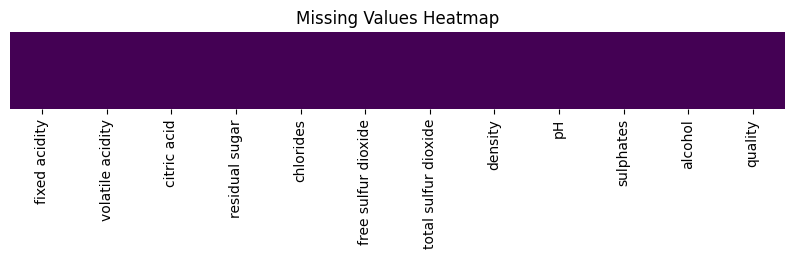

In [80]:
# Check for missing values
df.isnull().sum()

# Confirm data types and structure
df.info()

# Visualize missing values (if any)
plt.figure(figsize=(10, 1))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

#### 2.2. Feature Engineering of the Data

New features are derived to enhance the model’s ability to capture patterns. Feature engineering can improve model performance by introducing domain-relevant transformations. <br>

These features were chosen to represent potential nonlinear effects and domain-specific relationships: <br>

- A higher sulfur ratio may indicate more preservative effectiveness.
- The acidity interaction may help capture combined taste characteristics.
- The alcohol-density ratio may serve as a proxy for fermentation quality.

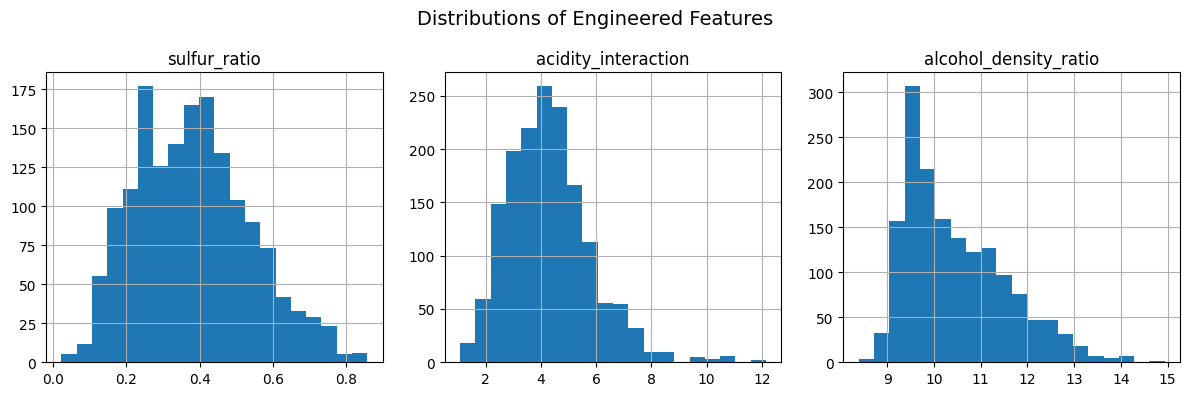

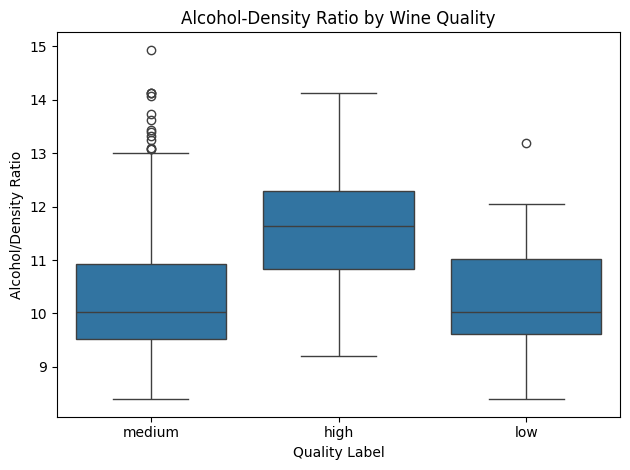

In [81]:
# Feature Engineering
df["sulfur_ratio"] = df["free sulfur dioxide"] / df["total sulfur dioxide"]
df["sulfur_ratio"] = df["sulfur_ratio"].fillna(0)  # Replace any division errors with 0

df["acidity_interaction"] = df["fixed acidity"] * df["volatile acidity"]
df["alcohol_density_ratio"] = df["alcohol"] / df["density"]

# Plot histograms of the new features
df[["sulfur_ratio", "acidity_interaction", "alcohol_density_ratio"]].hist(
    bins=20, figsize=(12, 4), layout=(1, 3))
plt.suptitle("Distributions of Engineered Features", fontsize=14)
plt.tight_layout()
plt.show()

# Recreate quality_label if missing
def quality_to_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

df["quality_label"] = df["quality"].apply(quality_to_label)

# Boxplot
sns.boxplot(data=df, x="quality_label", y="alcohol_density_ratio")
plt.title("Alcohol-Density Ratio by Wine Quality")
plt.xlabel("Quality Label")
plt.ylabel("Alcohol/Density Ratio")
plt.tight_layout()
plt.show()

#### 2.3. Encoding of the Data

The original wine quality scores (integers) are converted into both categorical labels and numerical class indices. This transformation simplifies the classification problem and allows use of multi-class classification techniques. <br>

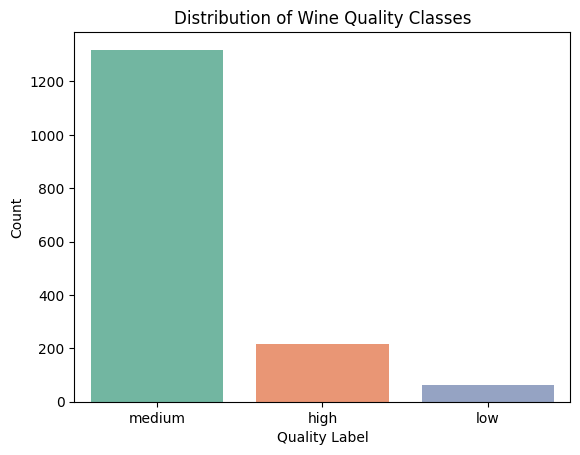

In [82]:
# Convert numeric wine scores into categorical quality labels
def quality_to_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

df["quality_label"] = df["quality"].apply(quality_to_label)

# Create numeric encoding for quality: low=0, medium=1, high=2
def quality_to_number(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2

# Visualization of Wine Quality Classes Distribution
sns.countplot(data=df, x="quality_label", hue="quality_label", palette="Set2", legend=False)
plt.title("Distribution of Wine Quality Classes")
plt.xlabel("Quality Label")
plt.ylabel("Count")
plt.show()

#### 2.4. Splitting of the Data

The dataset is split into training and test sets using stratified sampling. Stratification ensures that all target classes (low, medium, high) are proportionally represented in both sets, supporting better generalization. <br>

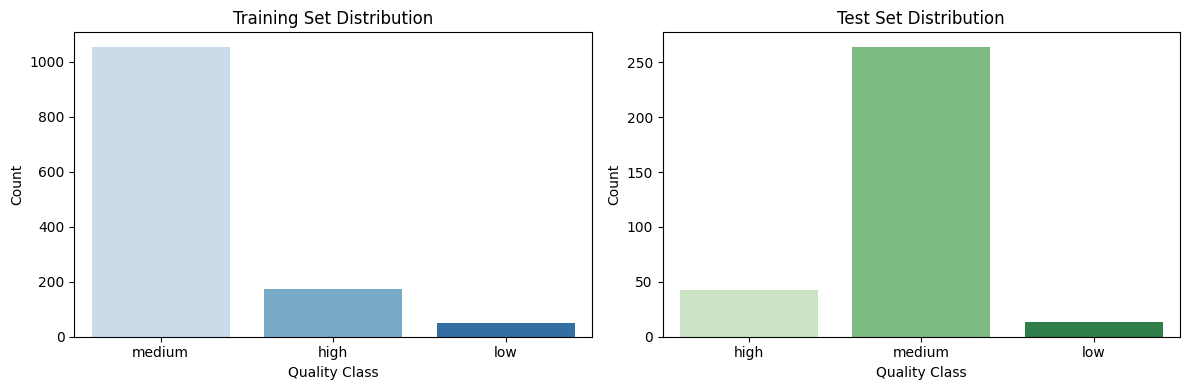

In [84]:
df["quality_numeric"] = df["quality"].apply(quality_to_number)
df["quality_label"] = df["quality"].apply(quality_to_label)

# Define input features (excluding target columns)
X = df.drop(columns=["quality", "quality_label", "quality_numeric"])
y = df["quality_numeric"]

# Stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create labeled versions for visualization
train_labels = pd.DataFrame({"quality_label": y_train.map({0: "low", 1: "medium", 2: "high"})})
test_labels = pd.DataFrame({"quality_label": y_test.map({0: "low", 1: "medium", 2: "high"})})

# Plot class distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=train_labels, x="quality_label", hue="quality_label", palette="Blues", legend=False, ax=ax[0])
ax[0].set_title("Training Set Distribution")
ax[0].set_xlabel("Quality Class")
ax[0].set_ylabel("Count")

sns.countplot(data=test_labels, x="quality_label", hue="quality_label", palette="Greens", legend=False, ax=ax[1])
ax[1].set_title("Test Set Distribution")
ax[1].set_xlabel("Quality Class")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

#### 2.5. Helper Functions of the Data

A helper function is created to streamline training and evaluation of models. It fits the model, computes predictions, and returns key performance metrics, including accuracy and F1 score on both training and testing data. This modular design promotes code reuse and consistency across model evaluations. <br>

In [85]:
# Helper function to evaluate any classifier model
def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")


### Section 3. Feature Selection and Justification 

In this section, the features (independent variables) and the target (dependent variable) are defined for model training. The original wine quality score and its derived labels are excluded from the input features, as these would introduce data leakage. The target variable selected is the numeric encoding of wine quality, which allows multi-class classification using supervised learning techniques. <br>

As a potential enhancement, visualizing the importance of features in a baseline ensemble model, such as a Random Forest, can provide insight into which variables most influence predictions. This can guide future feature selection or model refinement efforts. <br>

The bar plot below visually ranks the features by their contribution to model predictions. Features such as alcohol, sulphates, or volatile acidity often appear as top predictors in wine classification tasks and may be strong candidates for further analysis or interaction modeling. <br>

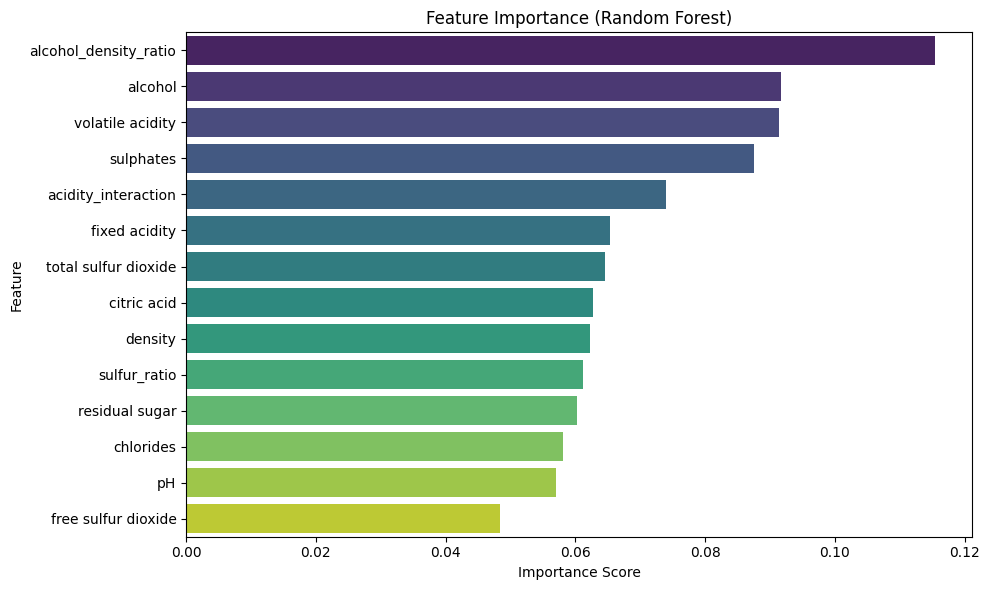

In [86]:
# Define input features and target variable
X = df.drop(columns=["quality", "quality_label", "quality_numeric"])  # Features
y = df["quality_numeric"]  # Target

# Fit a quick random forest for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances.values,
    y=importances.index,
    hue=importances.index,  # Explicitly define hue to avoid warning
    palette="viridis",
    dodge=False,
    legend=False  # Hide redundant legend
)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Section 4. Split the Data into Train and Test

To evaluate model generalization, the dataset is divided into training and testing subsets. The training set is used to fit the models, while the test set is held out to assess predictive performance on unseen data. Stratified sampling is used to ensure that each quality class (low, medium, high) is proportionally represented in both sets, which is critical for maintaining classification consistency, especially in imbalanced datasets. <br>

In [87]:
# Stratified split to maintain class distribution across train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm split sizes
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 1279
Test set size: 320


### Section 5. Evaluate Model Performance

This section assesses the performance of ensemble and neural network models by training them on the prepared dataset and evaluating their predictive capabilities. Models are compared using metrics such as accuracy and F1 score on both the training and test sets. The evaluation helps determine which models generalize well to unseen data and are most suitable for predicting wine quality. <br>

#### 5.1. Random Forest (100)

Random Forest with 100 estimators serves as a strong baseline model. It constructs multiple decision trees using bootstrapped subsets of the data and averages their predictions, which reduces overfitting and increases model stability. <br>

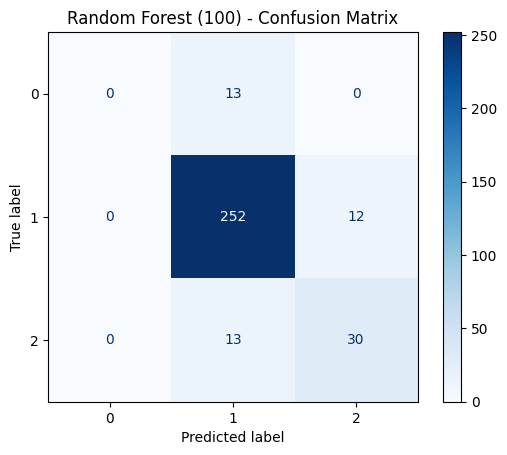

In [88]:
# Initialize results list
results = []

# Random Forest (100)
rf100 = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model("Random Forest (100)", rf100, X_train, y_train, X_test, y_test, results)

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(rf100, X_test, y_test, cmap="Blues")
disp.ax_.set_title("Random Forest (100) - Confusion Matrix")
plt.show()

#### 5.2. Random Forest (200, max_depth=10)

This variation increases the number of estimators and constrains tree depth to limit complexity. Reducing tree depth can improve generalization by avoiding overfitting while still leveraging the ensemble effect. <br>

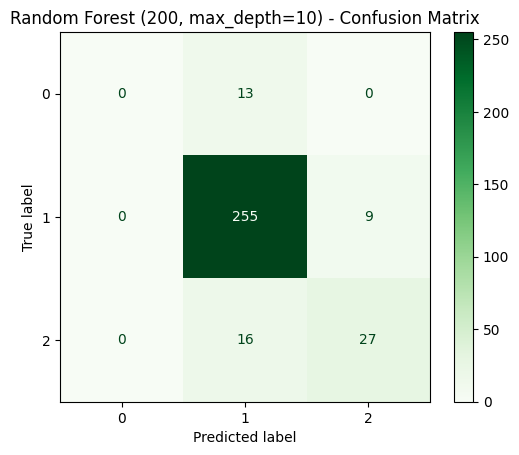

In [89]:
# Random Forest (200, max_depth=10)
rf200_limited = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
evaluate_model("Random Forest (200, max_depth=10)", rf200_limited, X_train, y_train, X_test, y_test, results)

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(rf200_limited, X_test, y_test, cmap="Greens")
disp.ax_.set_title("Random Forest (200, max_depth=10) - Confusion Matrix")
plt.show()

#### 5.3. MLP Classifier

The Multi-Layer Perceptron (MLP) is a basic neural network that learns nonlinear patterns through weighted transformations and activation functions. While powerful, MLPs may require more training and careful parameter tuning to outperform tree-based methods. <br>

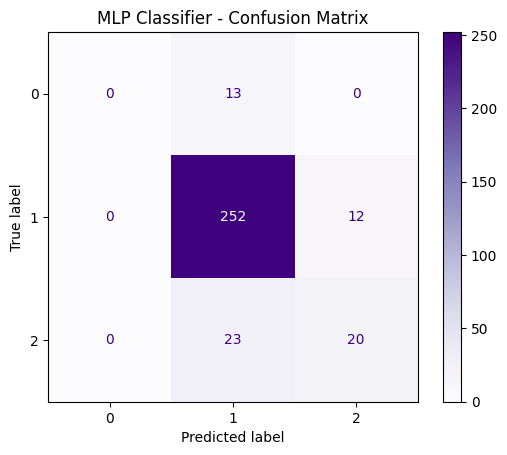

In [90]:
# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
evaluate_model("MLP Classifier", mlp, X_train, y_train, X_test, y_test, results)

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, cmap="Purples")
disp.ax_.set_title("MLP Classifier - Confusion Matrix")
plt.show()

#### 5.4. XGBoost Classifier

The Extreme Gradient Boosting (XGBoost) model is selected as the additional classifier due to its superior performance on structured datasets, particularly in classification tasks with non-linear relationships and imbalanced classes. It offers regularization, scalability, and fine control over learning rate and depth, often outperforming standard ensembles. <br>

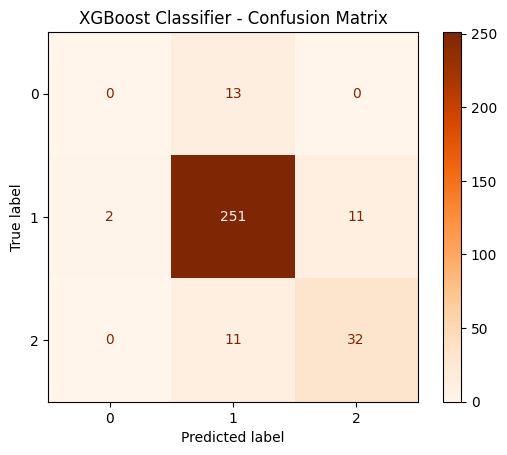

In [91]:
# XGBoost Classifier - Best Fit Model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",  # Required for multi-class classification
    random_state=42
)

evaluate_model("XGBoost Classifier", xgb_model, X_train, y_train, X_test, y_test, results)

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap="Oranges")
disp.ax_.set_title("XGBoost Classifier - Confusion Matrix")
plt.show()

### Section 6. Compare Results 

This section presents a comparative analysis of all evaluated models based on their performance metrics. The metrics include training and testing accuracy, as well as weighted F1 scores. To assess generalization, the differences (gaps) between training and testing performance are calculated. These gaps are critical indicators of overfitting or underfitting. Models with smaller gaps and high test performance are considered more reliable for deployment. <br>

By organizing the results into a DataFrame and visualizing them, the best-performing models can be identified not only by test accuracy but also by consistency between training and testing performance.  <br>

#### 6.1. Table Comparison of Results

The model comparison table evaluates the performance of each classifier using accuracy and F1 scores for both training and test sets, along with the calculated gaps between them. Models with high test accuracy and F1 scores are considered strong performers, as they demonstrate effective prediction on unseen data. A small gap between training and test results indicates that the model generalizes well and is not overfitting. In contrast, a large gap suggests overfitting or poor generalization. Therefore, a good fit is indicated by both strong test performance and minimal difference between training and test metrics. <br>


In [99]:
# Define evaluation function
def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Train F1": train_f1,
        "Test F1": test_f1,
    })

# Initialize results
results = []

# Run evaluations (ensure model variables are defined)
evaluate_model("Random Forest (100)", rf100, X_train, y_train, X_test, y_test, results)
evaluate_model("Random Forest (200, max_depth=10)", rf200_limited, X_train, y_train, X_test, y_test, results)
evaluate_model("MLP Classifier", mlp, X_train, y_train, X_test, y_test, results)
evaluate_model("XGBoost Classifier", xgb_model, X_train, y_train, X_test, y_test, results)

# Create results DataFrame with gap calculations
results_df = pd.DataFrame(results)
results_df["Accuracy Gap"] = results_df["Train Accuracy"] - results_df["Test Accuracy"]
results_df["F1 Score Gap"] = results_df["Train F1"] - results_df["Test F1"]
results_df_sorted = results_df.sort_values(by="Test Accuracy", ascending=False)

# 🔧 Font color version of highlight function
def highlight_best_values_green_text(df):
    df_numeric = df.select_dtypes(include=['float64', 'int64'])
    styled_df = pd.DataFrame('', index=df.index, columns=df.columns)

    for column in df_numeric.columns:
        if 'Gap' in column:
            best_idx = df[column].idxmin()
        else:
            best_idx = df[column].idxmax()

        styled_df.loc[best_idx, column] = 'color: green'

    return styled_df

# Show styled DataFrame with green best values
results_df_sorted.style.apply(highlight_best_values_green_text, axis=None)


,Model,Train Accuracy,Test Accuracy,Train F1,Test F1,Accuracy Gap,F1 Score Gap
3,XGBoost Classifier,1.000000,0.884375,1.000000,0.868367,0.115625,0.131633
0,Random Forest (100),1.000000,0.881250,1.000000,0.862012,0.118750,0.137988
1,"Random Forest (200, max_depth=10)",0.973417,0.881250,0.971781,0.859643,0.092167,0.112138
2,MLP Classifier,0.849101,0.850000,0.825747,0.824928,-0.000899,0.000819


### Section 7. Conclusions and Insights

# Using both your results and the results from others, which options are performing well and why do you think so. 

# This is your value as an analyst - narrate your story, link to other notebooks, provide a comprehensive view of what you feel is the best model for predicting quality in red wine. Base all your reasoning on data. Feel free to tune parameters if you like.  Discuss the types of models and why you think some seem to be more helpful. List the next steps you'd like to try if you were in a competition to build the best predictor. 

# Don't just copy code and don't just copy AI insights - use them to learn, but we all get them for free. Use all your tools to provide your own unique value and insights. Professional communication skills are critical. Evaluate your work in the context of others - how well can you craft a unique data story and present a compelling project to your clients / readers / self. 

### References:

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. _Decision Support Systems_, _47_(4), 547–553. https://doi.org/10.1016/j.dss.2009.05.016 <br>